In [48]:
import torch

In [49]:
# path = "output/hypernerf2/broom/point_cloud/iteration_14000/deformation.pth"
# path = "output/dnerf_tv/bouncingballs/point_cloud/iteration_20000/deformation.pth"

# path = "output/dynerf_emptyvoxel1/cut_roasted_beef/point_cloud/iteration_14000/deformation.pth"

path = "/root/autodl-tmp/4DGS_MotionMag/output/synthetic/mic_5Hz_000/point_cloud/iteration_20000/deformation.pth"

In [50]:
data = torch.load(path)

In [51]:
data.keys()

odict_keys(['time_poc', 'pos_poc', 'rotation_scaling_poc', 'opacity_poc', 'timenet.0.weight', 'timenet.0.bias', 'timenet.2.weight', 'timenet.2.bias', 'deformation_net.grid.aabb', 'deformation_net.grid.grids.0.0', 'deformation_net.grid.grids.0.1', 'deformation_net.grid.grids.0.2', 'deformation_net.grid.delta_grids.0.0', 'deformation_net.grid.delta_grids.0.1', 'deformation_net.grid.delta_grids.0.2', 'deformation_net.static_mlp.1.weight', 'deformation_net.static_mlp.1.bias', 'deformation_net.static_mlp.3.weight', 'deformation_net.static_mlp.3.bias', 'deformation_net.feature_out.0.weight', 'deformation_net.feature_out.0.bias', 'deformation_net.pos_deform.1.weight', 'deformation_net.pos_deform.1.bias', 'deformation_net.pos_deform.3.weight', 'deformation_net.pos_deform.3.bias', 'deformation_net.scales_deform.1.weight', 'deformation_net.scales_deform.1.bias', 'deformation_net.scales_deform.3.weight', 'deformation_net.scales_deform.3.bias', 'deformation_net.rotations_deform.1.weight', 'deforma

grid00 torch.Size([1, 32, 512, 512])
grid01 torch.Size([1, 32, 512, 512])
grid02 torch.Size([1, 32, 512, 512])
odict_keys(['time_poc', 'pos_poc', 'rotation_scaling_poc', 'opacity_poc', 'timenet.0.weight', 'timenet.0.bias', 'timenet.2.weight', 'timenet.2.bias', 'deformation_net.grid.aabb', 'deformation_net.grid.grids.0.0', 'deformation_net.grid.grids.0.1', 'deformation_net.grid.grids.0.2', 'deformation_net.grid.delta_grids.0.0', 'deformation_net.grid.delta_grids.0.1', 'deformation_net.grid.delta_grids.0.2', 'deformation_net.static_mlp.1.weight', 'deformation_net.static_mlp.1.bias', 'deformation_net.static_mlp.3.weight', 'deformation_net.static_mlp.3.bias', 'deformation_net.feature_out.0.weight', 'deformation_net.feature_out.0.bias', 'deformation_net.pos_deform.1.weight', 'deformation_net.pos_deform.1.bias', 'deformation_net.pos_deform.3.weight', 'deformation_net.pos_deform.3.bias', 'deformation_net.scales_deform.1.weight', 'deformation_net.scales_deform.1.bias', 'deformation_net.scales_deform.3.weight', 'deformation_net.scales_deform.3.bias', 'deformation_net.rotations_deform.1.weight', 'deformation_net.rotations_deform.1.bias', 'deformation_net.rotations_deform.3.weight', 'deformation_net.rotations_deform.3.bias', 'deformation_net.opacity_deform.1.weight', 'deformation_net.opacity_deform.1.bias', 'deformation_net.opacity_deform.3.weight', 'deformation_net.opacity_deform.3.bias', 'deformation_net.shs_deform.1.weight', 'deformation_net.shs_deform.1.bias', 'deformation_net.shs_deform.3.weight', 'deformation_net.shs_deform.3.bias'])


In [52]:
import torch

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid_value = {}
for grid_id1 in range(1):
    for grid_id2 in range(3):
        grid_value[f"grid{grid_id1}{grid_id2}"] = data[f'deformation_net.grid.grids.{grid_id1}.{grid_id2}']
        print(f"grid{grid_id1}{grid_id2}",data[f'deformation_net.grid.grids.{grid_id1}.{grid_id2}'].shape)

delta_grid_value = {}
for grid_id1 in range(1):
    for grid_id2 in range(3):
        delta_grid_value[f"delta_grid{grid_id1}{grid_id2}"] = data[f'deformation_net.grid.delta_grids.{grid_id1}.{grid_id2}']
        print(f"delta_grid{grid_id1}{grid_id2}",data[f'deformation_net.grid.delta_grids.{grid_id1}.{grid_id2}'].shape)

def visualize_tensor(tensor):
    # 假设 batch size 为 1，移除 batch 维度
    tensor = tensor.squeeze(0)

    # 确保有 16 个通道
    assert tensor.size(0) == 32

    # 设置画布大小
    plt.figure(figsize=(15, 15))

    # 创建 4x4 的 GridSpec 网格
    gs = gridspec.GridSpec(4, 4)

    for i in range(tensor.size(0)):
        # 为每个通道的图像创建子图
        if i >=16:break
        ax = plt.subplot(gs[i])
        
        # 显示图像
        ax.imshow(tensor[i], cmap='twilight')
        ax.axis('off')
    
    # 调整子图布局
#     plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0, hspace=0)
    plt.show()


grid00 torch.Size([1, 32, 512, 512])
grid01 torch.Size([1, 32, 512, 512])
grid02 torch.Size([1, 32, 512, 512])
delta_grid00 torch.Size([1, 32, 512, 512])
delta_grid01 torch.Size([1, 32, 512, 512])
delta_grid02 torch.Size([1, 32, 512, 512])


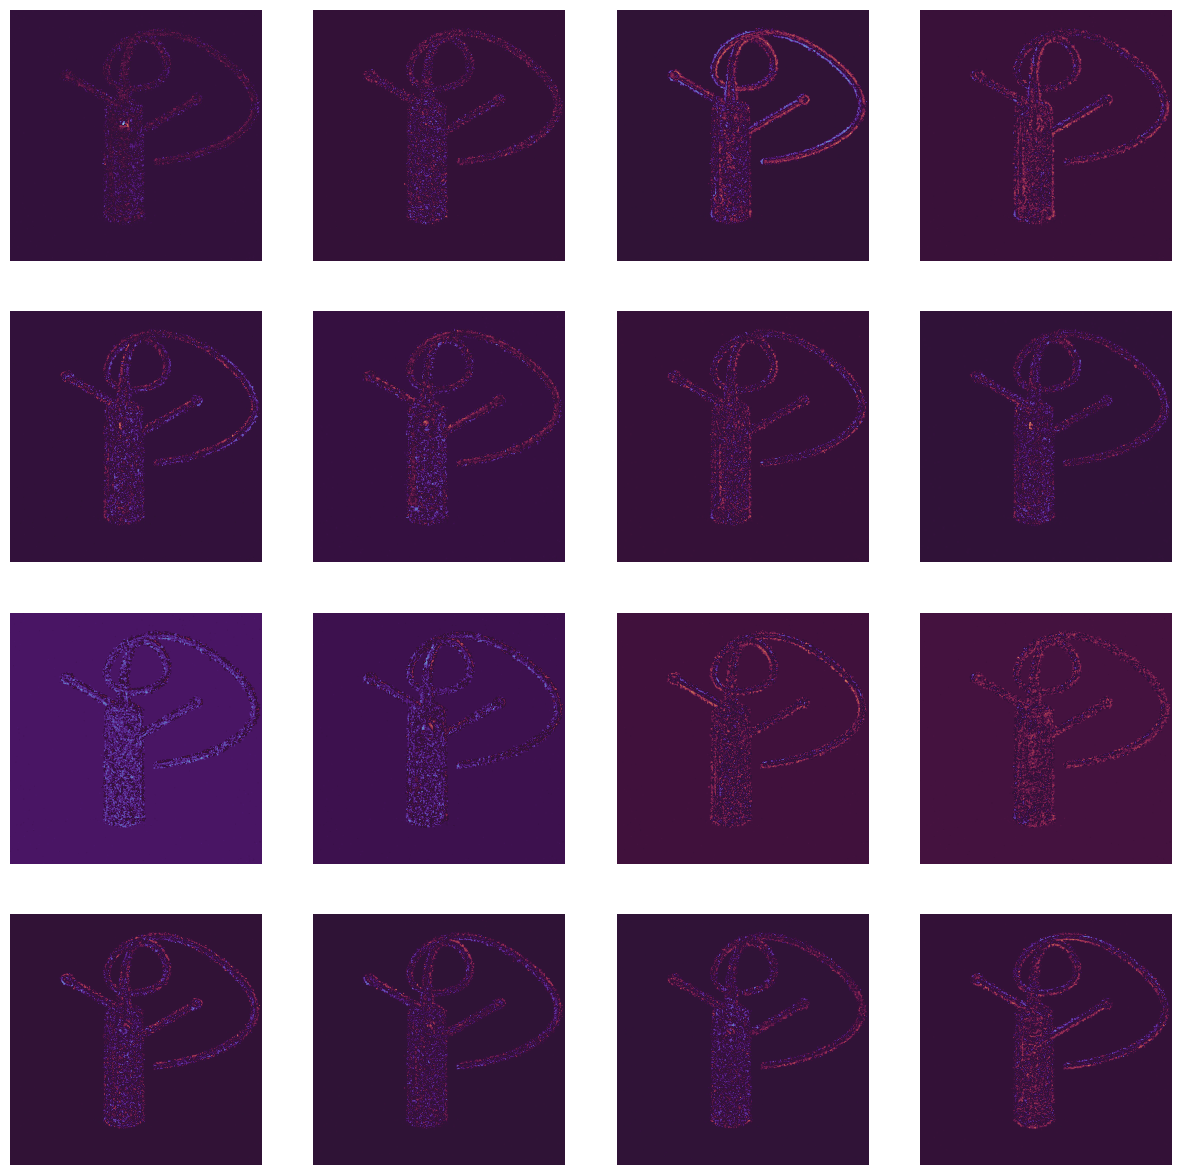

In [53]:
visualize_tensor(grid_value[f"grid00"].cpu())

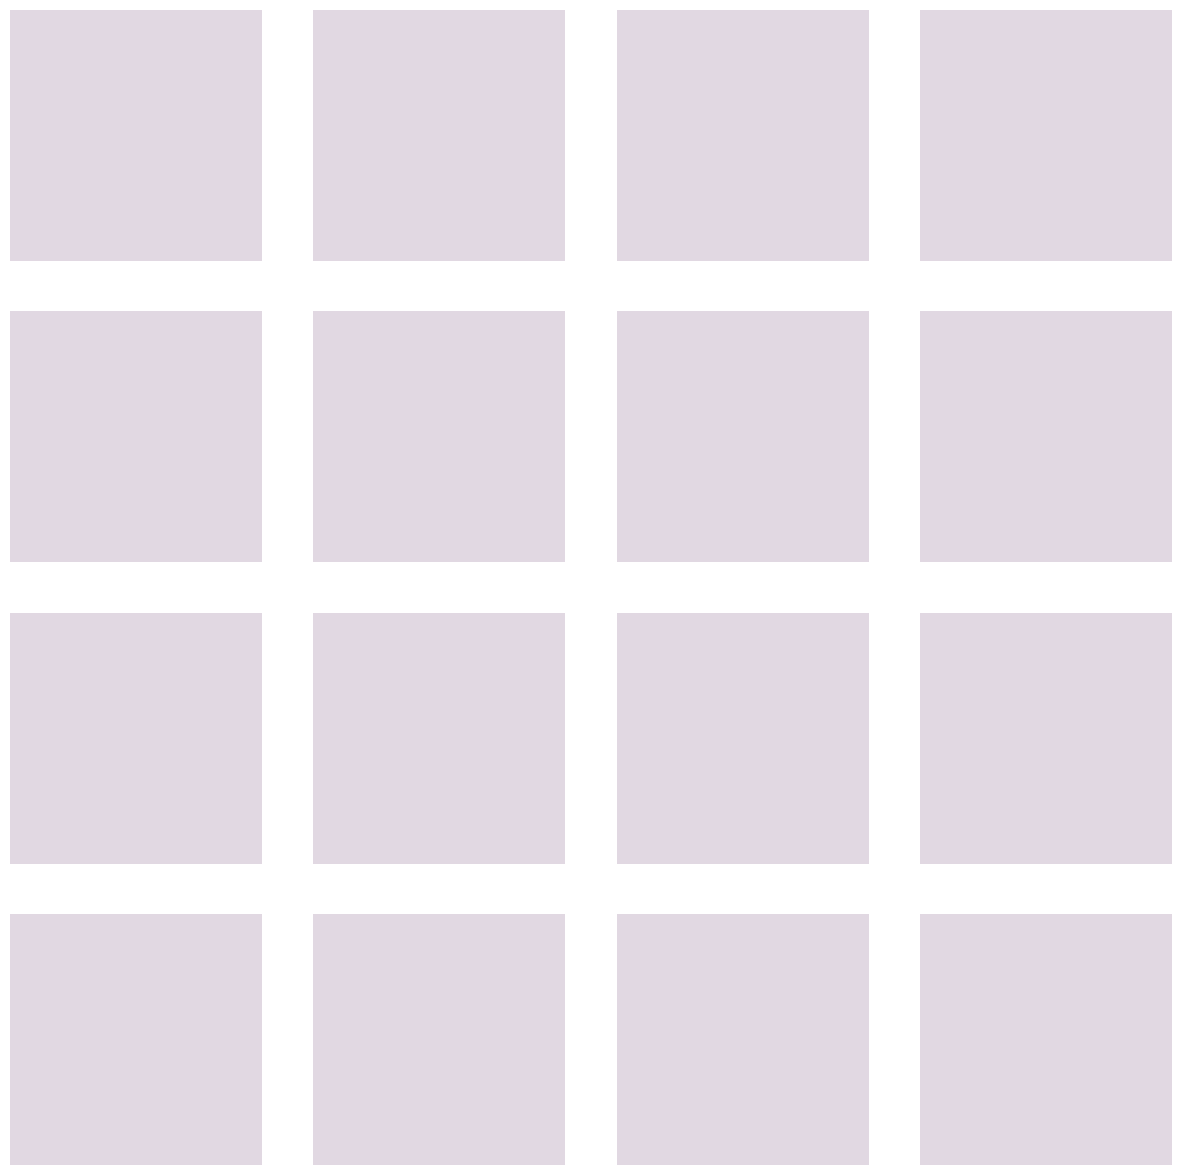

In [54]:
visualize_tensor(delta_grid_value[f"delta_grid00"].cpu())

In [55]:
import torch


# 检查 delta_grid_value["delta_grid00"].cpu() 是否全为 0
is_all_zero = torch.all(delta_grid_value[f"delta_grid00"].cpu() == 0)

print(is_all_zero)  # 如果全为 0，则输出 True，否则输出 False

tensor(True)


In [56]:
path = "/root/autodl-tmp/4DGS_MotionMag/output/synthetic/mic_5Hz/007/point_cloud/iteration_27000/deformation.pth"

In [57]:
data = torch.load(path)

In [58]:
grid_value = {}
for grid_id1 in range(1):
    for grid_id2 in range(3):
        grid_value[f"grid{grid_id1}{grid_id2}"] = data[f'deformation_net.grid.grids.{grid_id1}.{grid_id2}']
        print(f"grid{grid_id1}{grid_id2}",data[f'deformation_net.grid.grids.{grid_id1}.{grid_id2}'].shape)

delta_grid_value = {}
for grid_id1 in range(1):
    for grid_id2 in range(3):
        delta_grid_value[f"delta_grid{grid_id1}{grid_id2}"] = data[f'deformation_net.grid.delta_grids.{grid_id1}.{grid_id2}']
        print(f"delta_grid{grid_id1}{grid_id2}",data[f'deformation_net.grid.delta_grids.{grid_id1}.{grid_id2}'].shape)


grid00 torch.Size([1, 32, 512, 512])
grid01 torch.Size([1, 32, 512, 512])
grid02 torch.Size([1, 32, 512, 512])
delta_grid00 torch.Size([1, 32, 512, 512])
delta_grid01 torch.Size([1, 32, 512, 512])
delta_grid02 torch.Size([1, 32, 512, 512])


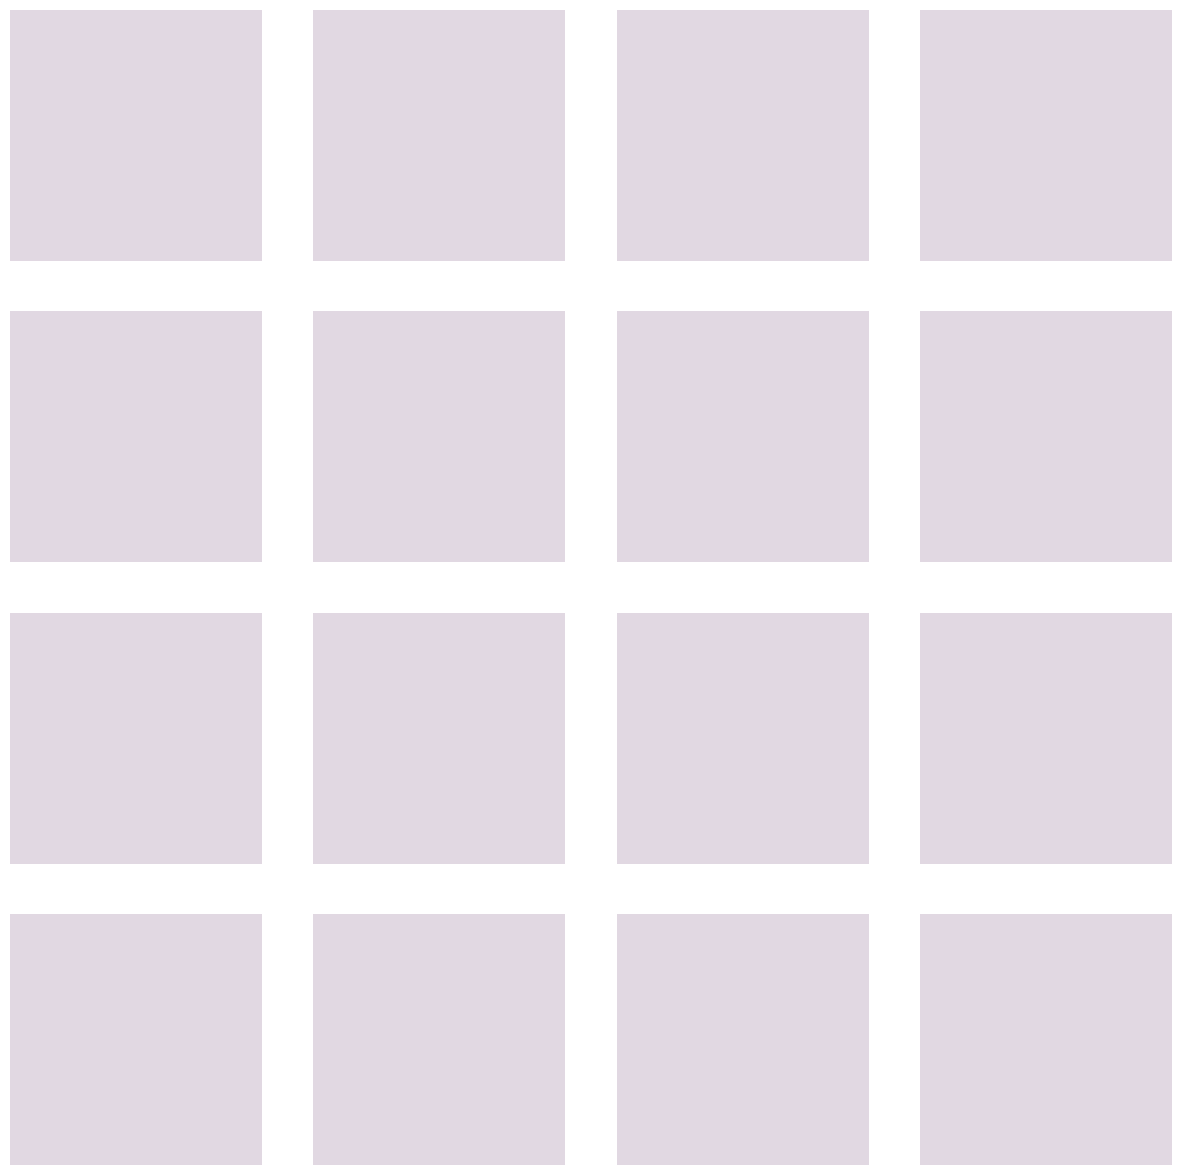

In [59]:
visualize_tensor(delta_grid_value[f"delta_grid00"].cpu())

In [ ]:
# 假设 delta_grid_value 是一个包含张量的字典


# 检查 delta_grid_value["delta_grid00"].cpu() 是否全为 0
is_all_zero = torch.all(delta_grid_value[f"delta_grid00"].cpu() == 0)

print(is_all_zero)  # 如果全为 0，则输出 True，否则输出 False

tensor(False)


In [61]:
# 假设 data 是一个包含张量的字典
data = {
    'deformation_net.grid.grids.0.0': torch.tensor([1.0, 2.0, 3.0], requires_grad=True),
    'deformation_net.grid.grids.0.1': torch.tensor([4.0, 5.0, 6.0], requires_grad=True),
    'deformation_net.grid.grids.0.2': torch.tensor([7.0, 8.0, 9.0], requires_grad=True),
    'deformation_net.grid.delta_grids.0.0': torch.tensor([0.1, 0.2, 0.3], requires_grad=True),
    'deformation_net.grid.delta_grids.0.1': torch.tensor([0.4, 0.5, 0.6], requires_grad=True),
    'deformation_net.grid.delta_grids.0.2': torch.tensor([0.7, 0.8, 0.9], requires_grad=True)
}

grid_value = {}
for grid_id1 in range(1):
    for grid_id2 in range(3):
        grid_value[f"grid{grid_id1}{grid_id2}"] = data[f'deformation_net.grid.grids.{grid_id1}.{grid_id2}']
        print(f"grid{grid_id1}{grid_id2}", data[f'deformation_net.grid.grids.{grid_id1}.{grid_id2}'].shape)

delta_grid_value = {}
for grid_id1 in range(1):
    for grid_id2 in range(3):
        delta_grid_value[f"delta_grid{grid_id1}{grid_id2}"] = data[f'deformation_net.grid.delta_grids.{grid_id1}.{grid_id2}']
        print(f"delta_grid{grid_id1}{grid_id2}", data[f'deformation_net.grid.delta_grids.{grid_id1}.{grid_id2}'].shape)

# 检查 data 的梯度并打印
for key, value in data.items():
    if value.requires_grad:
        print(f"{key} requires gradient.")
        if value.grad is not None:
            print(f"{key} gradient: {value.grad}")
        else:
            print(f"{key} gradient: None")
    else:
        print(f"{key} does not require gradient.")

grid00 torch.Size([3])
grid01 torch.Size([3])
grid02 torch.Size([3])
delta_grid00 torch.Size([3])
delta_grid01 torch.Size([3])
delta_grid02 torch.Size([3])
deformation_net.grid.grids.0.0 requires gradient.
deformation_net.grid.grids.0.0 gradient: None
deformation_net.grid.grids.0.1 requires gradient.
deformation_net.grid.grids.0.1 gradient: None
deformation_net.grid.grids.0.2 requires gradient.
deformation_net.grid.grids.0.2 gradient: None
deformation_net.grid.delta_grids.0.0 requires gradient.
deformation_net.grid.delta_grids.0.0 gradient: None
deformation_net.grid.delta_grids.0.1 requires gradient.
deformation_net.grid.delta_grids.0.1 gradient: None
deformation_net.grid.delta_grids.0.2 requires gradient.
deformation_net.grid.delta_grids.0.2 gradient: None
